### Import files

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./mnist_train.csv")

### Check file is imported and explore

In [4]:
df.shape

(42000, 785)

In [5]:
# First column is the y axis and the other 784 is the x axis
# Each digit is 28 * 28 which makes 784
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [23]:
# Convert dataframe to numpy array
data = df.values

# When doing shuffling it should be done on the array
np.random.shuffle(data)

In [8]:
print(type(data))

<class 'numpy.ndarray'>


In [9]:
data.shape

(42000, 785)

In [10]:
# Separate y and x values, each row in x will denote an image, each y will denote a label
# Select all the rows and the columns from 1 onwards
X = data[ : , 1: ]

# Select all the rows and the first column
Y = data[ : , 0]

In [11]:
print(X.shape, Y.shape)

(42000, 784) (42000,)


### Visualise an image

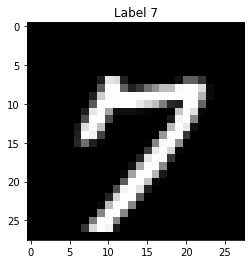

In [24]:
def draw_img(X, Y, i):
    # Will need to reshape data into 28 * 28
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title("Label "+ str(Y[i]))
    plt.show()

# Will differ after shuffling    
draw_img(X, Y, 0)

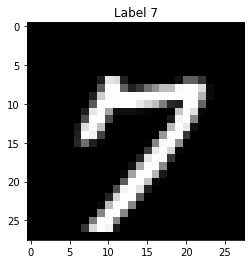

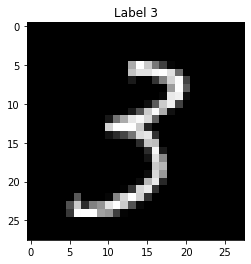

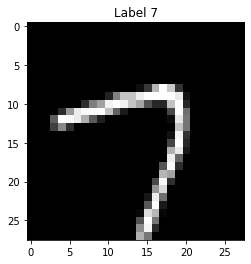

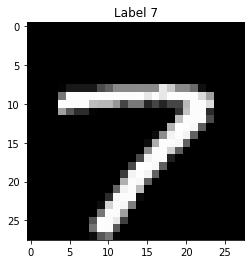

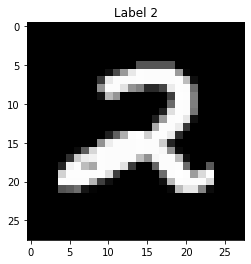

In [26]:
# Draw the first 5 images in the dataset
# Will change due to shuffling
for i in range(5):
    draw_img(X, Y, i)

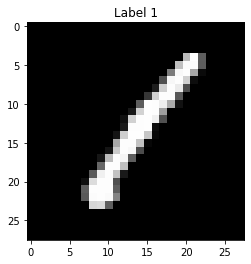

In [19]:
# Draw the first image in the dataset
for i in range(1):
    draw_img(X, Y, i)

### Splitting the dataset

In [20]:
# Split dataset
split = int(0.80 * X.shape[0])
print(split)

33600


In [21]:
# Setup training and testing
# The first 33600 rows will be training data, the rest will be testing
X_train, Y_train = X[ :split, :], Y[:split]
X_test, Y_test = X[split: , : ], Y[split: ]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [27]:
# Data may not be uniformly random so may need to be randomised
# This should be done on the array

### Plotting a visualisation

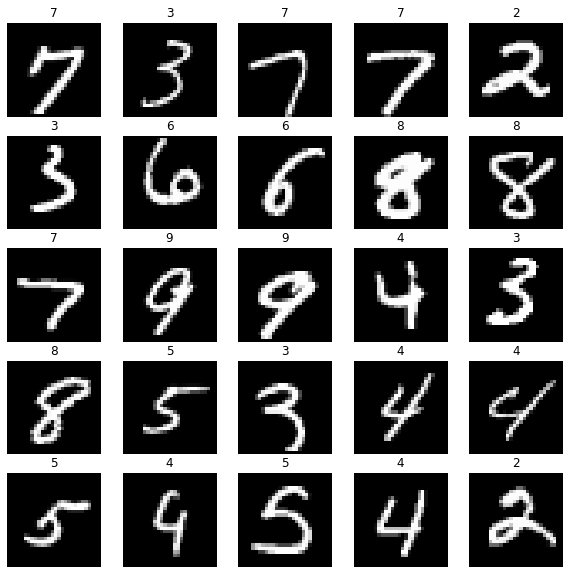

In [32]:
# Plotting a visualisation of a grid of the first 25 images

# Increase figure size
plt.figure(figsize=(10,10))

for i in range(25):
    # Sets up 5 * 5 grid
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    
    # Turn axis off
    plt.axis("off")
    
    # Show Y title
    plt.title(Y_train[i])

In [33]:
# If you do not want to split dataset manually the sklearn library can be used

In [36]:
from sklearn.model_selection import train_test_split

XT, Xt, YT, Yt = train_test_split(X, Y, test_size=0.2)
print(XT.shape, YT.shape)
print(Xt.shape, Yt.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)
